# ch-5-tp-hw-qn2-cpu-api

# Q2: Code `./fork.py -a 100 -f (0.1 to 0.9)` 
or `./fork.py -a 100 --fork_percentage 0.1`
**Setup**: 
- Use `fork_percentage` or `-f` represents likelihood the next action is a **fork**.

**Task**: 
- Predict the `process-tree` as different levels of `fork_percentage` (-f) for a large number of actions (-a)
    - Use `-f` (`0.1` to `0.9`)
    - Use `-a 100` (for 100 actions)
    - Use `-c` to check answers

# Q2 TP Solution Attempt
## Q2.1 Output: `-f 0.1`

In [4]:
!./og/fork.py -a 100 -f 0.1


ARG seed -1
ARG fork_percentage 0.1
ARG actions 100
ARG action_list 
ARG show_tree False
ARG just_final False
ARG leaf_only False
ARG local_reparent False
ARG print_style fancy
ARG solve False

                           Process Tree:
                               a

Action: a forks b
Process Tree?
Action: b EXITS
Process Tree?
Action: a forks c
Process Tree?
Action: c EXITS
Process Tree?
Action: a forks d
Process Tree?
Action: d EXITS
Process Tree?
Action: a forks e
Process Tree?
Action: e EXITS
Process Tree?
Action: a forks f
Process Tree?
Action: f EXITS
Process Tree?
Action: a forks g
Process Tree?
Action: g EXITS
Process Tree?
Action: a forks h
Process Tree?
Action: h EXITS
Process Tree?
Action: a forks i
Process Tree?
Action: i EXITS
Process Tree?
Action: a forks j
Process Tree?
Action: j EXITS
Process Tree?
Action: a forks k
Process Tree?
Action: k forks l
Process Tree?
Action: l EXITS
Process Tree?
Action: k EXITS
Process Tree?
Action: a forks m
Process Tree?
Action: m EXITS


## Q2.2 Tonys Notes 
- The question did not provide a **Seed Number** (`-s`). 
- To me, this implies they want me to figure out the ***expected*** `process-tree` regardless of the seed, based on two metrics:
    - `-f` `fork_percentage` and
    - `-a` actions
- I'll make a table with a range of `fork_percentage`(`-f`) of my predictions



## Q2.3 Prediction Table
### Q2.3a Table Requirements
Table should include:  
- the code run
- Set specific seed:
    - Seed 10: `-s 10`
- Set `fork_percentage`(`-f`): range 10% to 90% 
    - 10%: `-f 0.1`
    - 30%: `-f 0.3`
    - 50%: `-f 0.5`
    - 70%: `-f 0.7`
    - 90%: `-f 0.9`
- 100 actions:
    - `-a 100`
- Check against answers (`-c`)

### Q2.3b Predictions Summary Table

Notes: 
`-f`: 
    - **Low**: less probability of `a` being `fork()`, or less copies...
    - **High**: less probability of `a` being `fork()`, or many copies...

My guess is the number of forks to be rougly calculated with this formula:
- = `forks_count` = `fork_percentage` * `actions`
- = `fk_ct` = (`-f`) * (
    
)

|Scenario|Args  |fork_percentage<br>`-f`|actions<br>`-a`|tonys formula<br>`fk_ct`=(`-f`)*(`-a`) |anwers<br>`-c`     |
|--------|----------------------------|---------------|---|-------------------|-------------------------------------|
|`1`     |`-s 10 -a 100 -f 0.1`       |`0.1`          |100|~10 forks       | almost none                            |
|`2`     |`-s 10 -a 100 -f 0.3`       |`0.3`          |100|~30 forks       | ...                                    |
|`3`     |`-s 10 -a 100 -f 0.5`       |`0.5`          |100|~50 forks       | ...                                    |
|`4`     |`-s 10 -a 100 -f 0.7`       |`0.7`          |100|~70 forks       | ...                                    |
|`5`     |`-s 10 -a 100 -f 0.9`       |`0.9`          |100|~90 forks       | many forks of forks etc                |  


In [7]:
!./og/fork.py -s 10 -a 100 -f 0.9 -c


ARG seed 10
ARG fork_percentage 0.9
ARG actions 100
ARG action_list 
ARG show_tree False
ARG just_final False
ARG leaf_only False
ARG local_reparent False
ARG print_style fancy
ARG solve True

                           Process Tree:
                               a

Action: a forks b
                               a
                               └── b
Action: a forks c
                               a
                               ├── b
                               └── c
Action: c forks d
                               a
                               ├── b
                               └── c
                                   └── d
Action: a forks e
                               a
                               ├── b
                               ├── c
                               │   └── d
                               └── e
Action: b forks f
                               a
                               ├── b
                               │   └── f
                    

                    ├── b
                               │   ├── f
                               │   │   └── g
                               │   │       └── k
                               │   └── n
                               ├── c
                               │   ├── i
                               │   │   ├── p
                               │   │   └── x
                               │   ├── w
                               │   ├── y
                               │   └── z
                               ├── e
                               │   ├── h
                               │   ├── j
                               │   └── s
                               ├── m
                               │   ├── o
                               │   │   └── r
                               │   └── v
                               ├── q
                               │   └── u
                               └── t
Action: v forks A
                               a
                 

# Q2c Solution: Fork Counts
- With a `low` `fork_percentage`, there **little to no** forks and each fork has an even lesser chance to fork.
    - My basic statistics tells me that a fork to fork again will be require 0.1*0.1 = 0.001 = 0.1% chance and so forth
- With a `high` `fork_percentage`, each fork has a **high probability** to be forked and forked again.
    - `A` (initial process) is forked twice (`A` has grandkids):
        - $0.9*0.9=81\%$
    - `A` forked 3 times (`A` great grand kids):
        - $0.9*0.9*0.9=81\%$

# Q2d Solution: Fork Counts Chart
- The $0.1^n$ probabilities drop dramatically to zero almost immediately.
- The Fork Chart shows $0.9^n$ remains relatively high compared to $0.1^n$.


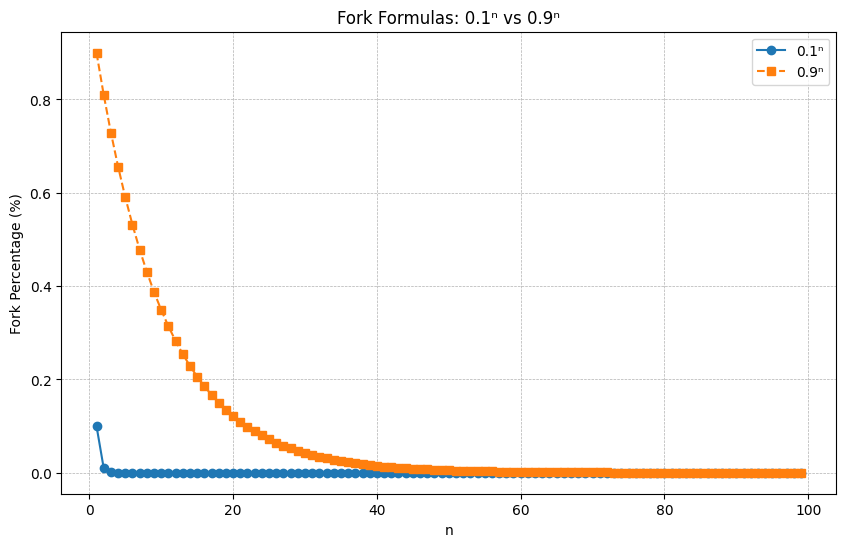

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate n values from 1 to 20
n = np.arange(1, 100)

# Compute the formulas
y1 = 0.1 ** n
y2 = 0.9 ** n

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n, y1, 'o-', label='0.1ⁿ')  # dots and line
plt.plot(n, y2, 's--', label='0.9ⁿ') # square dots and dashed line

# Labels and title
plt.title('Fork Formulas: 0.1ⁿ vs 0.9ⁿ')
plt.xlabel('n')
plt.ylabel('Fork Percentage (%)')
# plt.yscale('log')  # Optional: better visualization for small values
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
# plt.tight_layout()

# Show plot
plt.show()
